### Graphviz backend  
This example, as far as all *-gv named ones, requres GraphViz tool binaries installed

In [1]:
import nographs as nog
from graphviz import Digraph

In [2]:
dict_1= {0:{111,2,4}, 111:{3,5}, 2:{3,6}, 3:{37}, 37:{7}, 4:{5,6}, 5:{57}, 57:{7}, 
         6:{67}, 67:{7}, 7:{} }

In [3]:
def adapter_graphviz( to_deco ):
    dot = Digraph()
    def wrapper_bg( x, t ):
        node = dot.node( str(hash(x)), str(x) )
        for result in to_deco(x, t):
            dot.edge( str(hash( x )), str(hash( result )), )
            yield result
    wrapper_bg.dot = dot
    return wrapper_bg

@adapter_graphviz
def forward(x, _):
    return dict_1[x]

In [4]:
trav_forward = nog.TraversalBreadthFirst( forward )
trav_forward.start_from( 0, )
list(trav_forward)

[2, 4, 111, 3, 6, 5, 37, 67, 57, 7]

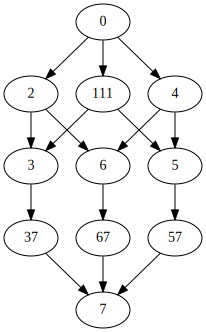

In [5]:
forward.dot